In [10]:
import datetime
from datetime import date
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import os
import sys
import xarray as xr
import pandas as pd
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt

Data paths

In [11]:
nino_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nino/nino34.long.anom.data.csv'
nino_final_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nino/nino34.long.anom.data.final.csv'

NA_stations_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/station_coordinates/noramsnow_1979_2021_stations.csv'

SWE_path = '/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nc_file/'
SWE_file_name = 'SWE_gapfilled_for_basin_06746095.nc'

SWE_test_file = SWE_path + SWE_file_name
print(SWE_test_file)

/Users/hasithaj/PycharmProjects/FROSTBYTE/capstone_data/nc_file/SWE_gapfilled_for_basin_06746095.nc


Nino index

In [12]:
nino_index = pd.read_csv(nino_path)
nino_index.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                      'Sep', 'Oct', 'Nov', 'Dec']

# Fill missing values with mean of the respective column 
nino_index_filled = nino_index.fillna(nino_index.mean())

# Verify missing values filled
print(nino_index_filled.head(10))



   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1871 -0.25 -0.58 -0.43 -0.50 -0.70 -0.53 -0.60 -0.33 -0.24 -0.33 -0.31   
1  1872 -0.72 -0.62 -0.50 -0.77 -0.62 -0.52 -0.32 -0.85 -1.02 -0.94 -0.79   
2  1873 -0.78 -1.01 -1.31 -0.67 -0.53 -0.48 -0.58 -0.39 -0.34 -0.78 -0.77   
3  1874 -0.93 -1.06 -1.40 -0.94 -0.86 -0.72 -1.00 -1.05 -1.13 -1.25 -1.33   
4  1875 -0.71 -0.37 -0.59 -0.87 -1.09 -0.76 -0.85 -0.81 -0.91 -0.83 -0.64   
5  1876 -0.95 -1.20 -1.13 -1.18 -1.08 -0.43 -0.34 -0.16 -0.02  0.11  0.15   
6  1877  0.35  0.46  0.52  0.50  0.76  0.98  1.42  1.54  1.75  1.95  2.08   
7  1878  2.41  2.43  1.31  0.92  0.82  0.92  0.25 -0.11 -0.32 -0.53 -0.70   
8  1879 -0.55 -0.18 -0.24 -0.37 -0.83 -0.67 -0.77 -0.69 -0.83 -0.93 -1.14   
9  1880 -1.00 -0.73 -0.62 -0.57 -0.71 -0.61 -0.53 -0.24 -0.03  0.17  0.24   

    Dec  
0 -0.58  
1 -0.88  
2 -0.70  
3 -1.14  
4 -0.75  
5  0.23  
6  2.49  
7 -0.75  
8 -1.02  
9  0.18  


In [13]:
# Create DataFrame
nino_df = pd.DataFrame(nino_index)

# Reshape DataFrame using melt function
nino_df = nino_df.melt(id_vars=['Year'], var_name='Month', value_name='nino_value')

# Combine Year and Month columns into a single date column
nino_df['Date'] = pd.to_datetime(nino_df['Year'].astype(str) + '-' + nino_df['Month'], format='%Y-%b')

# Sort DataFrame by Date
nino_df = nino_df.sort_values('Date')

# Optionally drop Year and Month columns if not needed
nino_df = nino_df.drop(['Year', 'Month'], axis=1)

print(nino_df)

      nino_value       Date
0          -0.25 1871-01-01
153        -0.58 1871-02-01
306        -0.43 1871-03-01
459        -0.50 1871-04-01
612        -0.70 1871-05-01
...          ...        ...
1223        1.56 2023-08-01
1376        1.65 2023-09-01
1529        1.59 2023-10-01
1682        2.01 2023-11-01
1835        1.81 2023-12-01

[1836 rows x 2 columns]


In [14]:
# Assuming you have a DataFrame named df with a 'Date' column

# Selecting data for a specific time period, for example, from January 2020 to June 2020
start_date = '1979-10-01'
end_date = '2022-07-01'

selected_data = nino_df[(nino_df['Date'] >= start_date) & (nino_df['Date'] <= end_date)]
variables = ['Date','nino_value']

print(selected_data)

      nino_value       Date
1485        0.32 1979-10-01
1638        0.35 1979-11-01
1791        0.69 1979-12-01
109         0.55 1980-01-01
262         0.33 1980-02-01
...          ...        ...
457        -0.84 2022-03-01
610        -0.90 2022-04-01
763        -1.02 2022-05-01
916        -0.77 2022-06-01
1069       -0.56 2022-07-01

[514 rows x 2 columns]


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

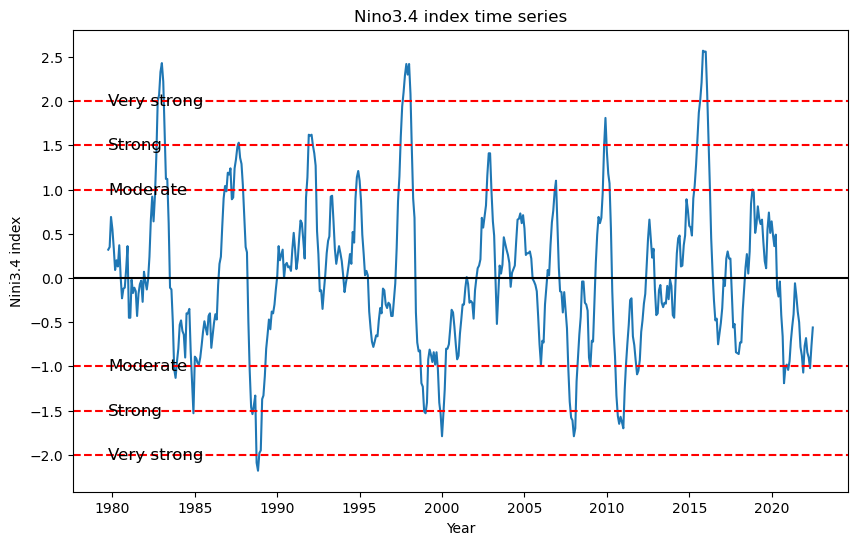

In [15]:
date = selected_data['Date']
Nino_value = selected_data['nino_value']

plt.figure(figsize=(10,6))
plt.plot(date,Nino_value, linestyle = '-')
plt.title('Nino3.4 index time series')
plt.xlabel('Year')
plt.ylabel('Nini3.4 index')
plt.axhline(0, color='black', linestyle='-')
plt.axhline(1, color='red', linestyle='--',label ='Moderate')
plt.axhline(1.5, color='red', linestyle='--', label = 'Strong')
plt.axhline(2, color='red', linestyle='--',label ='Very strong')
plt.axhline(-1, color='red', linestyle='--',label ='Moderate')
plt.axhline(-1.5, color='red', linestyle='--', label = 'Strong')
plt.axhline(-2, color='red', linestyle='--',label ='Very strong')
plt.text(date.iloc[0], 1.0, 'Moderate', color='black', fontsize=12, va='center')
plt.text(date.iloc[0], 1.5, 'Strong', color='black', fontsize=12, va='center')
plt.text(date.iloc[0], 2.0, 'Very strong', color='black', fontsize=12, va='center')
plt.text(date.iloc[0], -1.0, 'Moderate', color='black', fontsize=12, va='center')
plt.text(date.iloc[0], -1.5, 'Strong', color='black', fontsize=12, va='center')
plt.text(date.iloc[0], -2.0, 'Very strong', color='black', fontsize=12, va='center')
plt.yticks([-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5])
plt.savefig('Nino_index.png')
plt.show
plt.close


In [16]:
NA_stations = pd.read_csv(NA_stations_path)
# Create a geometry column with Point objects
geometry = [Point(lon, lat) for lon, lat in zip(NA_stations['lon'], NA_stations['lat'])]

# Create a GeoDataFrame from the DataFrame and the geometry column
gdf = gpd.GeoDataFrame(NA_stations, geometry=geometry, crs="EPSG:4326")

# Print the GeoDataFrame to see the structure
print(gdf)


       station_id        lat         lon                     geometry
0     ALE-05AA805  49.266666 -114.349998  POINT (-114.35000 49.26667)
1     ALE-05AA806  49.816666 -114.633331  POINT (-114.63333 49.81667)
2     ALE-05AD802  49.250000 -114.050003  POINT (-114.05000 49.25000)
3     ALE-05AE804  48.833332 -113.716667  POINT (-113.71667 48.83333)
4     ALE-05AE805  48.766666 -113.699997  POINT (-113.70000 48.76667)
...           ...        ...         ...                          ...
6607   US_NE_1599  45.223415  -68.575625   POINT (-68.57563 45.22342)
6608   US_NE_1600  45.476738  -68.553666   POINT (-68.55367 45.47674)
6609   US_NE_1598  45.323000  -68.580930   POINT (-68.58093 45.32300)
6610   US_NE_1602  43.872777  -70.457029   POINT (-70.45703 43.87278)
6611   US_NE_1604  44.097894  -70.597600   POINT (-70.59760 44.09789)

[6612 rows x 4 columns]


Plot stations available

/var/folders/g6/d7zppkyj7g98fd6kn97dkcq40000gn/T/ipykernel_69685/2890749961.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


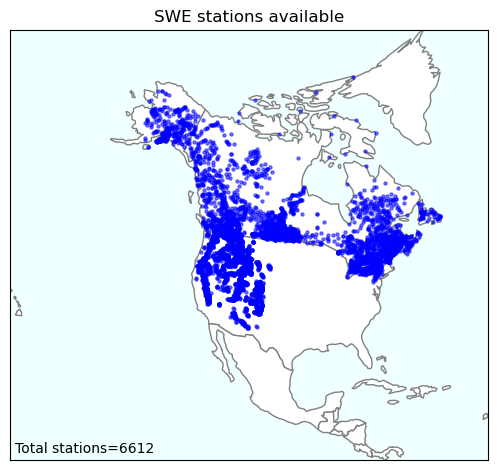

In [17]:
# Plot SWE stations available
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
NA_gdf = world_gdf[world_gdf['continent']=='North America'].to_crs("ESRI:102008")
ax = NA_gdf.plot(linewidth=1, edgecolor='grey', color='white')
SWE_stations_gdf = gdf.copy().to_crs("ESRI:102008")
SWE_stations_gdf.plot(ax=ax, color='b', alpha=.5, markersize=5)             
minx, miny, maxx, maxy = np.nanmin(NA_gdf.geometry.bounds.minx),np.nanmin(NA_gdf.geometry.bounds.miny),np.nanmax(NA_gdf.geometry.bounds.maxx),np.nanmax(NA_gdf.geometry.bounds.maxy)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax.set_facecolor('azure')
plt.title('SWE stations available')
plt.text(.01, .01,'Total stations='+str(len(SWE_stations_gdf.index)), ha='left', va='bottom', transform=ax.transAxes)
plt.tight_layout();
plt.savefig('SWE_stations.png')
plt.show()
plt.close()

In [18]:
basin_02DD013 = xr.open_dataset(SWE_path+"SWE_gapfilled_for_basin_02DD013.nc")

SWE_testbasin_ds = basin_02DD013.to_dataframe().drop(columns=['flag','donor_stations'])
# Flatten the DataFrame
SWE_testbasin_ds = SWE_testbasin_ds.reset_index()

# Drop rows with empty SWE
SWE_testbasin_ds = SWE_testbasin_ds.dropna(subset=['SWE'])

display(SWE_testbasin_ds, 10)




,time,station_id,SWE
3012,1987-12-30,ONR-6005,28.000000
3028,1988-01-15,ONR-6005,31.000000
3045,1988-02-01,ONR-6005,41.000000
3046,1988-02-02,ONR-6005,43.142857
3047,1988-02-03,ONR-6005,45.285713
...,...,...,...
15564,2022-05-12,ONR-6005,0.000000
15565,2022-05-13,ONR-6005,0.000000
15566,2022-05-14,ONR-6005,0.000000
15567,2022-05-15,ONR-6005,0.000000


10

In [19]:
# Convert time to datetime format
SWE_testbasin_ds['time'] = pd.to_datetime(SWE_testbasin_ds['time'], format="%Y-%m-%d")
# Create a new column that contains the year and month
SWE_testbasin_ds['month'] = SWE_testbasin_ds['time'].dt.to_period('M').dt.to_timestamp()
# Calculate average SWE for each time and station_id
SWE_avg = SWE_testbasin_ds.groupby(['month', 'station_id'])['SWE'].mean().reset_index()

display(SWE_avg, 10)

,month,station_id,SWE
0,1987-12-01,ONR-6005,28.000000
1,1988-01-01,ONR-6005,31.000000
2,1988-02-01,ONR-6005,71.206894
3,1988-03-01,ONR-6005,117.500000
4,1988-12-01,ONR-6005,17.453125
...,...,...,...
204,2022-01-01,ONR-6005,32.500000
205,2022-02-01,ONR-6005,88.196426
206,2022-03-01,ONR-6005,89.533333
207,2022-04-01,ONR-6005,26.892857


10

In [20]:
SWE_avg_month = SWE_testbasin_ds.groupby(['month'])['SWE'].mean().reset_index()

display(SWE_avg_month, 10)

,month,SWE
0,1987-12-01,28.000000
1,1988-01-01,31.000000
2,1988-02-01,71.206894
3,1988-03-01,117.500000
4,1988-12-01,17.453125
...,...,...
204,2022-01-01,32.500000
205,2022-02-01,88.196426
206,2022-03-01,89.533333
207,2022-04-01,26.892857


10

In [21]:
# Firstly, we need to make sure that both 'YearMonth' and 'time' are in datetime format
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
SWE_avg_month['month'] = pd.to_datetime(SWE_avg_month['month'])

# Merge the dataframes
df_merged = pd.merge(left=SWE_avg_month, right=selected_data, right_on='Date', left_on='month')

df_merged = df_merged.drop(['Date'], axis=1).rename(columns={'Value':'Nino'})

display(df_merged, 10)

/var/folders/g6/d7zppkyj7g98fd6kn97dkcq40000gn/T/ipykernel_69685/2512731973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Date'] = pd.to_datetime(selected_data['Date'])


,month,SWE,nino_value
0,1987-12-01,28.000000,1.05
1,1988-01-01,31.000000,0.69
2,1988-02-01,71.206894,0.35
3,1988-03-01,117.500000,0.29
4,1988-12-01,17.453125,-1.98
...,...,...,...
204,2022-01-01,32.500000,-0.77
205,2022-02-01,88.196426,-0.68
206,2022-03-01,89.533333,-0.84
207,2022-04-01,26.892857,-0.90


10

# Filter data for November through April
filtered_df = df_merged[(df_merged['month'].dt.month >= 11) | (df_merged['month'].dt.month <= 4)]

# Group by year
filtered_df['year'] = filtered_df['month'].dt.year
grouped_by_year = filtered_df.groupby('year')

# Calculate annual average SWE
annual_avg_swe = grouped_by_year['SWE'].mean()

# Calculate annual average Nino index
annual_avg_nino = grouped_by_year['nino_value'].mean()

# Create a DataFrame with both annual averages
annual_avg_df = pd.DataFrame({'SWE': annual_avg_swe, 'Nino Index': annual_avg_nino})


display(annual_avg_df)


In [22]:
#select El-nino events >1.00
select_Elnino = df_merged[df_merged['Nino Index']>1.00]

display(select_Elnino)

KeyError: 'Nino Index'

Correlation Analysis

In [ ]:
#scatter plot of SWE Vs Nino index
plt.figure(figsize=(10,6))
plt.scatter(select_Elnino['Nino Index'],select_Elnino['SWE'])
plt.title('SWE Vs Nino3.4 index')
plt.xlabel('Nino3.4 index')
plt.ylabel('SWE')
plt.ylim(0)
plt.xlim(1)
plt.axvline(1, color='black', linestyle='-')

#plot trend line
z = np.polyfit(select_Elnino['Nino Index'],select_Elnino['SWE'], 1)
p = np.poly1d(z)
plt.plot(select_Elnino['Nino Index'], p(select_Elnino['Nino Index']), "r--")
plt.show

Composite analysis